## Reading in the Featureset

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn.preprocessing import scale
from sklearn.svm import SVR

# For Visualization
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline

# matplotlib.style.use('ggplot')
df=pd.read_csv('features.csv')

print("Read in CSV")

Read in CSV


In [2]:
df.head(5)

,Quarter end,Shares split adjusted,Assets,Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,Goodwill & intangibles,Long-term debt,Revenue,...,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Gain,Id
0,2016-12-31,596200000,32906000000,22563000000,10298000000,45000000,0,11486000000,10723000000,7329000000,...,8.62,21.66,45.49,0.5294,1.0413,0.3130,0.1677,0.90,1.000000,1
1,2016-09-30,601466401,34051000000,22003000000,12002000000,46000000,0,11852000000,11079000000,7709000000,...,9.04,22.69,44.38,0.5329,0.9231,0.3525,0.1640,0.90,0.966609,1
2,2016-06-30,604400291,33235000000,21298000000,11894000000,43000000,0,11833000000,9299000000,7662000000,...,8.75,21.74,43.27,0.5291,0.7818,0.3579,0.1629,0.91,1.051670,1
3,2016-03-31,606514530,32982000000,21208000000,11733000000,41000000,0,11926000000,8927000000,7409000000,...,7.81,19.93,42.16,0.5219,0.7608,0.3557,0.1631,0.92,1.119680,1
4,2015-12-31,605038186,32718000000,20971000000,11708000000,39000000,0,11850000000,8799000000,7298000000,...,7.55,19.32,41.05,0.5253,0.7515,0.3578,0.1596,0.95,1.011652,1


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)

print df.shape
print new_df.shape

shuffled = np.arange(len(new_df))
np.random.shuffle(shuffled)

train_size = int(0.8*len(new_df))
test_size = len(new_df) - train_size

train_df = new_df.ix[shuffled[:train_size]]
test_df = new_df.ix[shuffled[train_size:]]

train_labels = train_df[['Gain']].values
test_labels = test_df[['Gain']].values

train_set = train_df.drop(['Gain'], axis=1).values
test_set = test_df.drop(['Gain'], axis=1).values

train_labels.flatten()

(27746, 31)
(27746, 30)


array([ 1.06153235,  1.01867267,  1.13093444, ...,  1.03138462,
        1.22952149,  1.03735547])

Train Model
Making Prediction


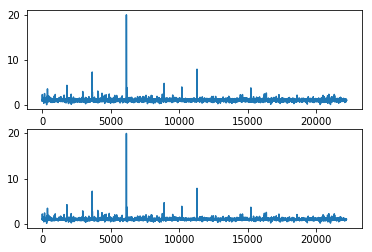

In [4]:
print "Train Model"
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf = svr_rbf.fit(train_set, train_labels.flatten())
print "Making Prediction"
prediction = svr_rbf.predict(train_set)

plt.subplot(2,1,1)
plt.plot(train_labels.flatten())
plt.subplot(2,1,2)
plt.plot(prediction)
plt.show()

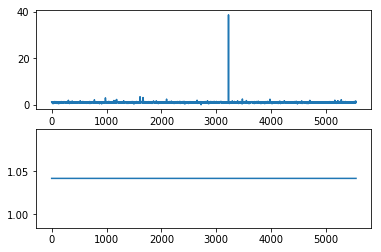

In [6]:
prediction = svr_rbf.predict(test_set)
plt.figure()
plt.subplot(2,1,1)
plt.plot(test_labels.flatten())

plt.subplot(2,1,2)
plt.plot(prediction)
plt.show()